### Dimensionality Reduction Comparison
#### Distance and Clustering Metrics
##### 20Nov18


In [1]:
import fcc_utils # this should have most of what we need for basics - PCA, tSNE, reading .hdf5 files, DCA, etc.

Using TensorFlow backend.


In [2]:
# let's also get the basics
import numpy as np
import scipy as sc
import pandas as pd

# and some extra scikit packages
import skbio
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# density peak clustering
from pydpc import Cluster

# plotting packages
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style = 'white')
%matplotlib inline

---
Read in dataset from **p-Creode** example data

In [7]:
myeloid = pd.read_csv('inputs/Myeloid_with_IDs.csv')
# extract data from pandas dataframe as np.ndarray
myeloid_vals = np.ascontiguousarray(myeloid.values.T, dtype='double')

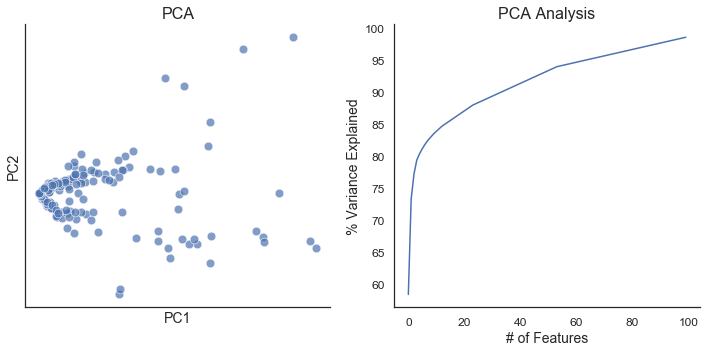

In [30]:
# this data is already normalized and transformed into appropriate space
# perform PCA
myeloid_PCA = fcc_utils.fcc_PCA(myeloid_vals, n_comp=100)

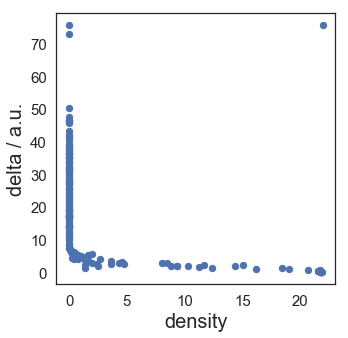

In [43]:
myeloid_pca_clu = Cluster(myeloid_PCA)

This PCA has one cluster.  Let's move on to t-SNE.

---
Perform t-SNE on these data

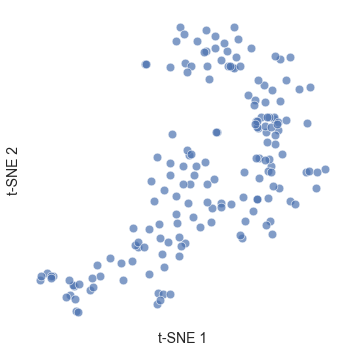

CPU times: user 996 ms, sys: 35.4 ms, total: 1.03 s
Wall time: 834 ms


In [31]:
%time myeloid_tSNE = fcc_utils.fcc_tSNE(myeloid_PCA)

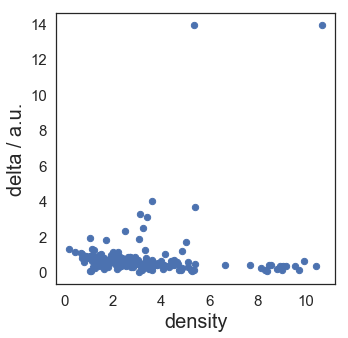

In [32]:
myeloid_tsne_clu = Cluster(myeloid_tSNE.astype('double')) # perform density peak clustering on tSNE for myeloid dataset

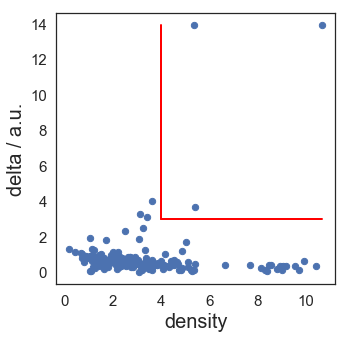

In [33]:
myeloid_tsne_clu.assign(4,3) # assign cluster centers; looks like there's only one for this dataset

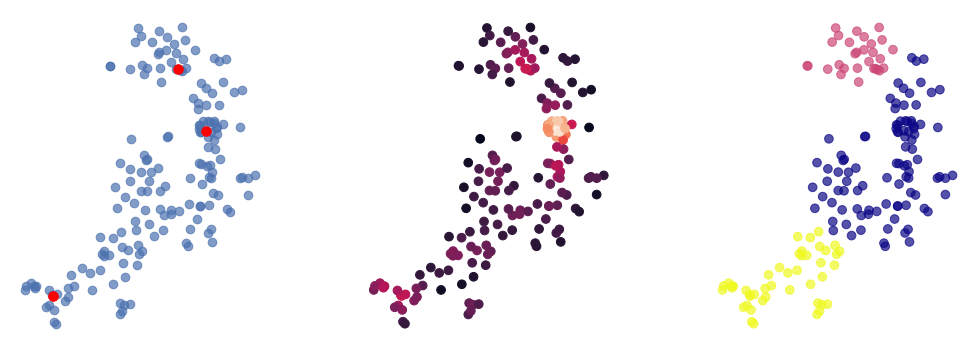

In [34]:
# plot clusters with point densities
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].scatter(myeloid_tSNE[:, 0], myeloid_tSNE[:, 1], s=75, alpha=0.7)
ax[0].scatter(myeloid_tSNE[myeloid_tsne_clu.clusters, 0], myeloid_tSNE[myeloid_tsne_clu.clusters, 1], s=90, c="red")
ax[1].scatter(myeloid_tSNE[:, 0], myeloid_tSNE[:, 1], s=75, c=myeloid_tsne_clu.density)
ax[2].scatter(myeloid_tSNE[:, 0], myeloid_tSNE[:, 1], s=75, c=myeloid_tsne_clu.membership, cmap=plt.cm.plasma, alpha=0.7)
for _ax in ax:
    _ax.set_aspect('equal')
    _ax.tick_params(labelbottom=False, labelleft=False)

sns.despine(left=True, bottom=True)
fig.tight_layout()

In [35]:
# calculate silhouette score for clustered results
silhouette_score(myeloid_tSNE, myeloid_tsne_clu.membership)

0.44306055

---
Perform UMAP on these data

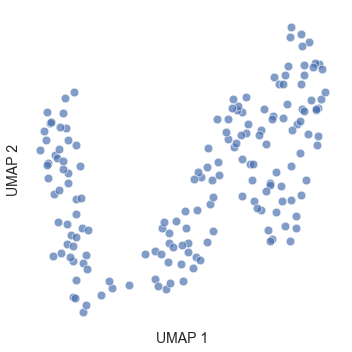

CPU times: user 568 ms, sys: 33.7 ms, total: 602 ms
Wall time: 486 ms


In [36]:
%time myeloid_UMAP = fcc_utils.fcc_UMAP(myeloid_PCA)

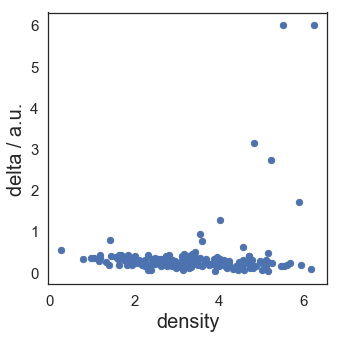

In [37]:
myeloid_umap_clu = Cluster(myeloid_UMAP.astype('double'))

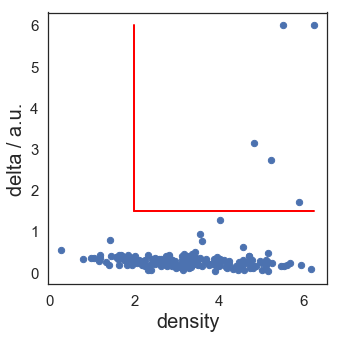

In [38]:
myeloid_umap_clu.assign(2,1.5)

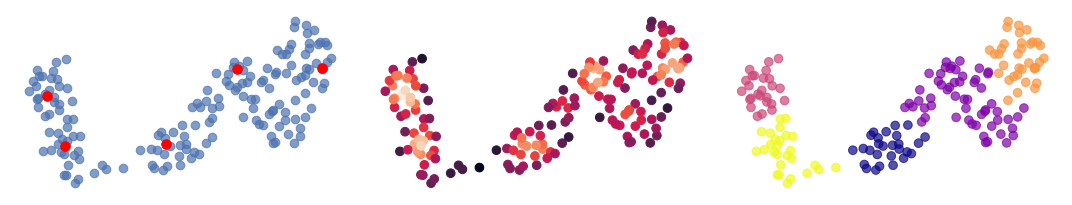

In [39]:
# plot clusters with point densities
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].scatter(myeloid_UMAP[:, 0], myeloid_UMAP[:, 1], s=75, alpha=0.7)
ax[0].scatter(myeloid_UMAP[myeloid_umap_clu.clusters, 0], myeloid_UMAP[myeloid_umap_clu.clusters, 1], s=90, c="red")
ax[1].scatter(myeloid_UMAP[:, 0], myeloid_UMAP[:, 1], s=75, c=myeloid_umap_clu.density)
ax[2].scatter(myeloid_UMAP[:, 0], myeloid_UMAP[:, 1], s=75, c=myeloid_umap_clu.membership, cmap=plt.cm.plasma, alpha=0.7)
for _ax in ax:
    _ax.set_aspect('equal')
    _ax.tick_params(labelbottom=False, labelleft=False)

sns.despine(left=True, bottom=True)
fig.tight_layout()

In [40]:
# calculate silhouette score for clustered results
silhouette_score(myeloid_UMAP, myeloid_umap_clu.membership)

0.48196197

---
Now compare UMAP to t-SNE using cell-cell distance correlation and distribution metrics.  
I updated this comparison in a few ways:  
* Euclidean distances are __normalized__ within each dataset by dividing all distances by the maximum value, yielding fractions between [0, 1]
* EMD and KLD are calculated using the cumulative probability distributions of the normalized distances

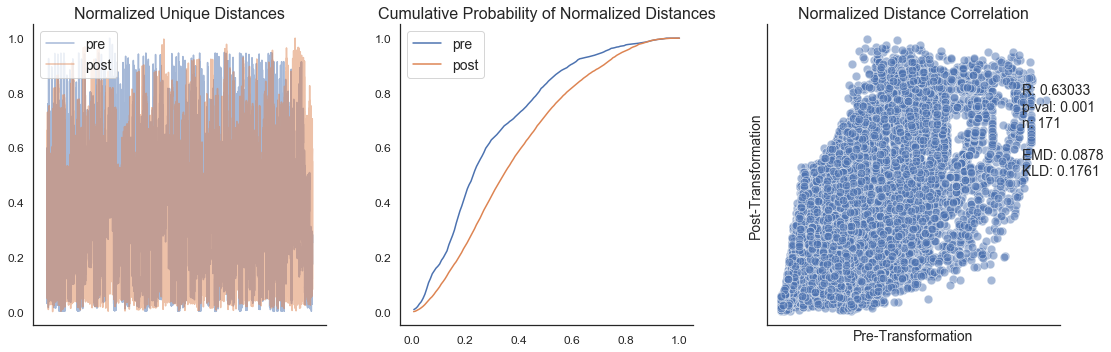

CPU times: user 1.87 s, sys: 113 ms, total: 1.98 s
Wall time: 1.37 s


In [41]:
%time mantel_tsne, EMD_tsne, KLD_tsne = fcc_utils.compare_euclid(pre=myeloid_PCA, post=myeloid_tSNE)

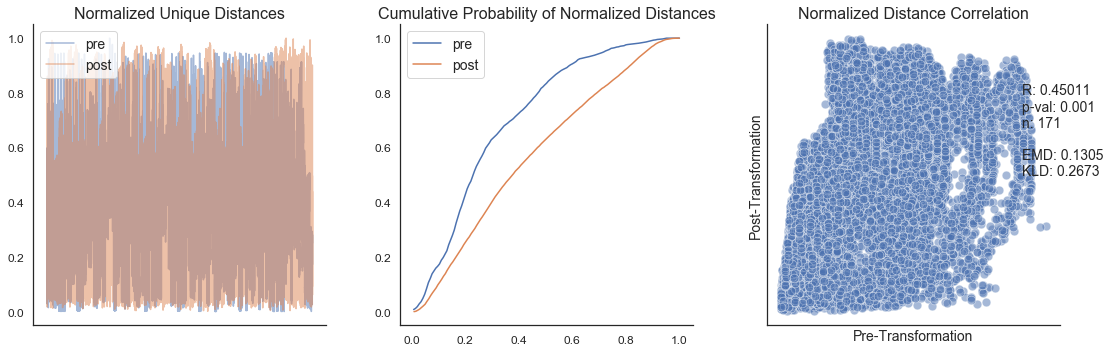

CPU times: user 1.82 s, sys: 103 ms, total: 1.92 s
Wall time: 1.33 s


In [42]:
%time mantel_tsne, EMD_tsne, KLD_tsne = fcc_utils.compare_euclid(pre=myeloid_PCA, post=myeloid_UMAP)

In this case, UMAP displays better clustering than tSNE based on it's silhouette score.  
But, it has larger divergence (EMD, KLD) from the cumulative distribution of cell-cell distances of PCA than t-SNE.  
Is this "information loss" by Euclidean distance okay, as long as subpopulations of cells can be more easily defined?  
  
Need to figure out a way to correlate the clustering between PCA and further DR techniques. Do the cells clustered by a "gold standard" method (i.e. 100-component PCA) also get clustered together using other techniques?

---
Compare different component numbers and complexities of PCA

In [45]:
# this data is already normalized and transformed into appropriate space
# perform PCA
myeloid_PCA_2 = fcc_utils.fcc_PCA(myeloid_vals, n_comp=2, plot_out=False)

In [47]:
# this data is already normalized and transformed into appropriate space
# perform PCA
myeloid_PCA_10 = fcc_utils.fcc_PCA(myeloid_vals, n_comp=10, plot_out=False)

In [48]:
# this data is already normalized and transformed into appropriate space
# perform PCA
myeloid_PCA_20 = fcc_utils.fcc_PCA(myeloid_vals, n_comp=20, plot_out=False)

In [49]:
# this data is already normalized and transformed into appropriate space
# perform PCA
myeloid_PCA_50 = fcc_utils.fcc_PCA(myeloid_vals, n_comp=50, plot_out=False)

Now look at their cell-cell distance correlations

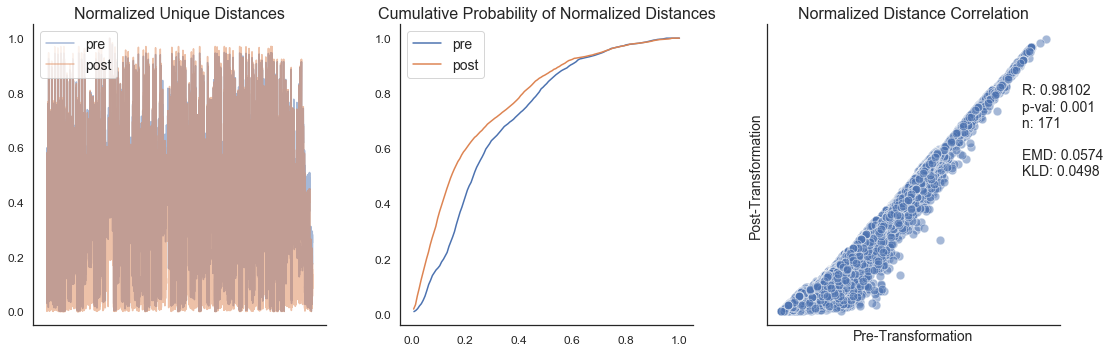

CPU times: user 1.72 s, sys: 102 ms, total: 1.82 s
Wall time: 1.22 s


In [50]:
%time mantel_tsne, EMD_tsne, KLD_tsne = fcc_utils.compare_euclid(pre=myeloid_PCA, post=myeloid_PCA_2)

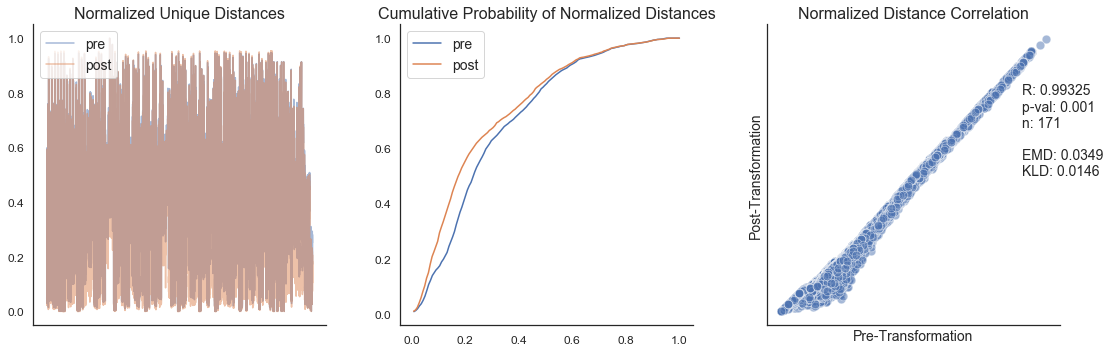

CPU times: user 1.71 s, sys: 108 ms, total: 1.82 s
Wall time: 1.22 s


In [51]:
%time mantel_tsne, EMD_tsne, KLD_tsne = fcc_utils.compare_euclid(pre=myeloid_PCA, post=myeloid_PCA_10)

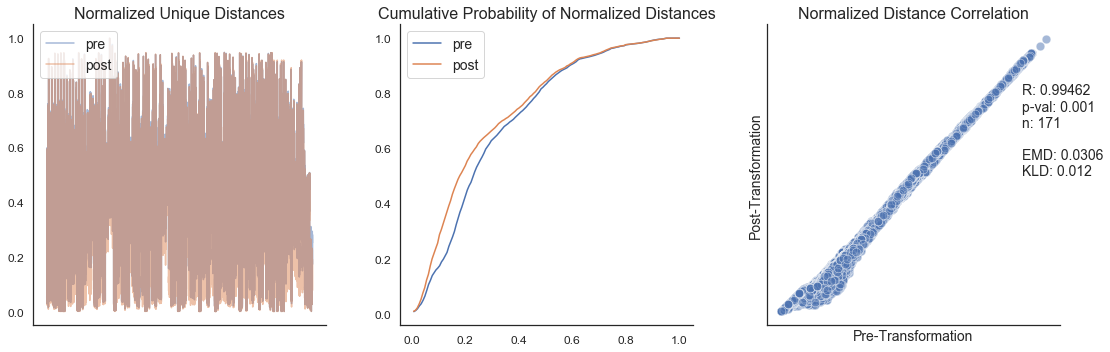

CPU times: user 1.71 s, sys: 104 ms, total: 1.81 s
Wall time: 1.21 s


In [52]:
%time mantel_tsne, EMD_tsne, KLD_tsne = fcc_utils.compare_euclid(pre=myeloid_PCA, post=myeloid_PCA_20)

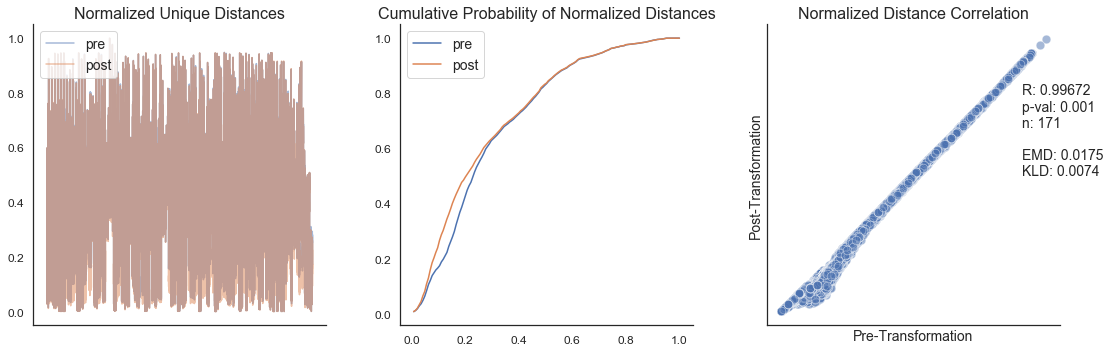

CPU times: user 1.7 s, sys: 105 ms, total: 1.81 s
Wall time: 1.2 s


In [53]:
%time mantel_tsne, EMD_tsne, KLD_tsne = fcc_utils.compare_euclid(pre=myeloid_PCA, post=myeloid_PCA_50)

As you __add components__, you get a better fit to the original, 100-component PCA. Makes sense.  
Now, let's add more than 100 components and see how much noise that introduces.

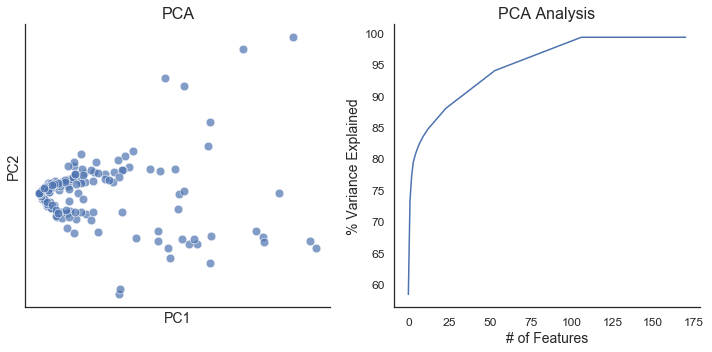

In [55]:
# the most I can do is 171 components for this dataset
# perform PCA
myeloid_PCA_171 = fcc_utils.fcc_PCA(myeloid_vals, n_comp=171, plot_out=True)

Now look at their cell-cell distance correlations

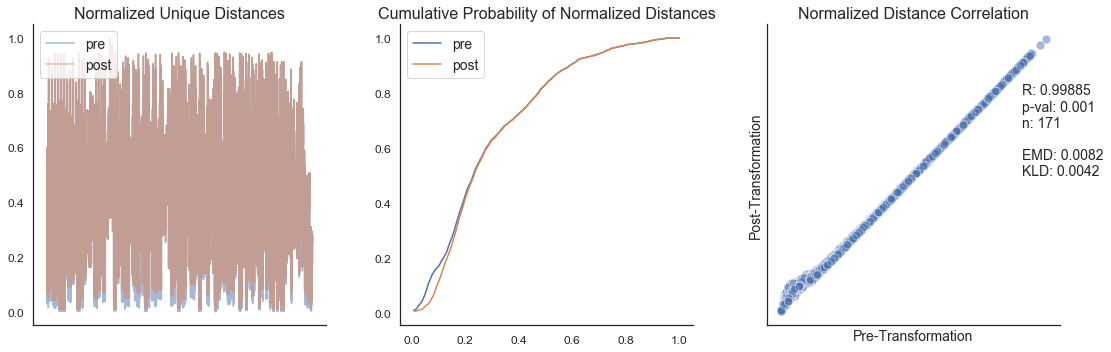

CPU times: user 1.68 s, sys: 100 ms, total: 1.78 s
Wall time: 1.17 s


In [56]:
%time mantel_tsne, EMD_tsne, KLD_tsne = fcc_utils.compare_euclid(pre=myeloid_PCA, post=myeloid_PCA_171)

Not much noise is introduced. I'm guessing because 100 components explains ~100% of the variance in the dataset, and the Scree plot plateaus for the last 71 components. Any values therein may jitter the points in Euclidean space a little bit, but not significantly enough to ruin the correlation.

---
Now look at an easily-clustered dataset to compare DCA to PCA for preprocessing

In [59]:
#load an hdf5 file into object
%time file = fcc_utils.read_hdf5("inputs/GSE102698ClosenessRep_0.hdf5")

# pull out single replicate of data
r00 = file['Close_0.00']

CPU times: user 2.42 s, sys: 363 ms, total: 2.79 s
Wall time: 2.84 s


In [71]:
r00.shape # look at size of matrix

(375, 25507)

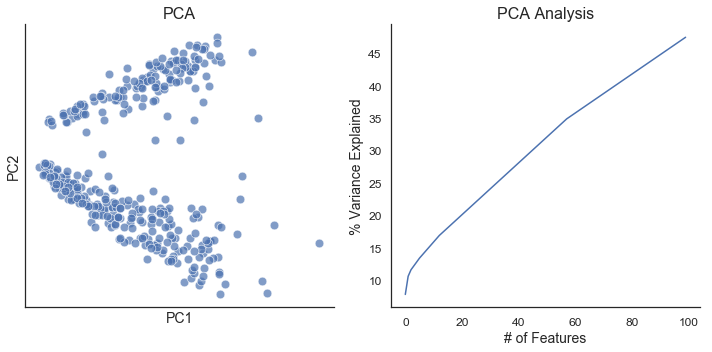

In [60]:
r00_norm = fcc_utils.arcsinh_norm(r00) # normalize first

r00_PCA = fcc_utils.fcc_PCA(r00_norm, n_comp=100) # perform PCA

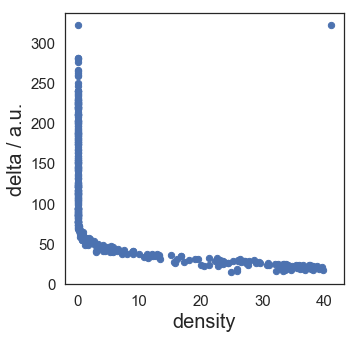

In [61]:
r00_pca_clu = Cluster(r00_PCA)

Again, only one cluster for the PCA output.  Let's move on.

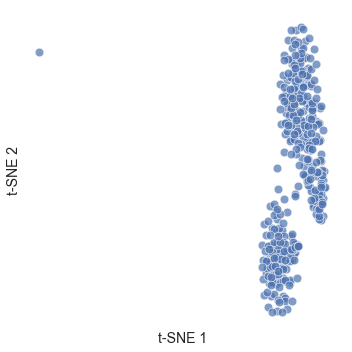

In [62]:
r00_tSNE = fcc_utils.fcc_tSNE(r00_PCA) # perform t-SNE

Weird outlier. Let's see how this plays out, but I think DCA would take care of this.

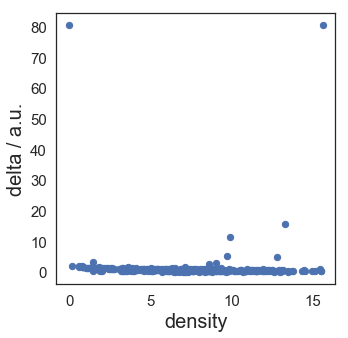

In [63]:
r00_tsne_clu = Cluster(r00_tSNE.astype('float'))

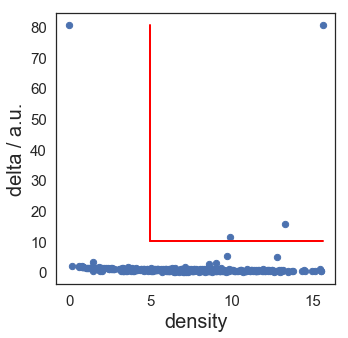

In [66]:
r00_tsne_clu.assign(5,10)

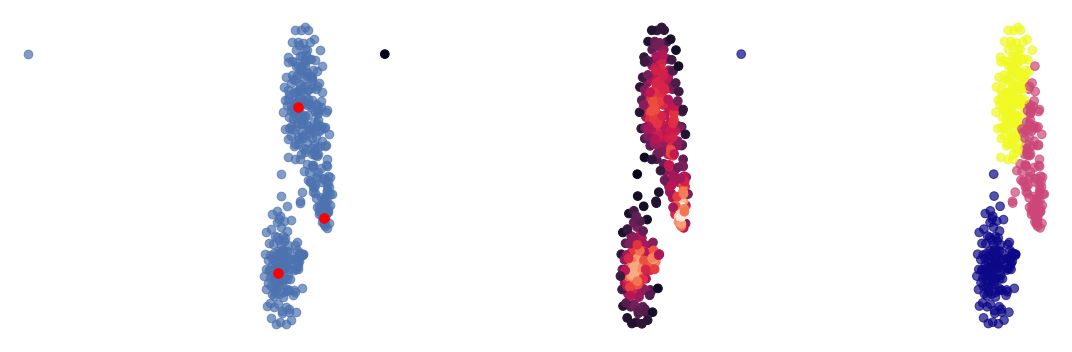

In [68]:
# plot clusters with point densities
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].scatter(r00_tSNE[:, 0], r00_tSNE[:, 1], s=75, alpha=0.7)
ax[0].scatter(r00_tSNE[r00_tsne_clu.clusters, 0], r00_tSNE[r00_tsne_clu.clusters, 1], s=90, c="red")
ax[1].scatter(r00_tSNE[:, 0], r00_tSNE[:, 1], s=75, c=r00_tsne_clu.density)
ax[2].scatter(r00_tSNE[:, 0], r00_tSNE[:, 1], s=75, c=r00_tsne_clu.membership, cmap=plt.cm.plasma, alpha=0.7)
for _ax in ax:
    #_ax.set_aspect('equal')
    _ax.tick_params(labelbottom=False, labelleft=False)

sns.despine(left=True, bottom=True)
fig.tight_layout()

In [69]:
# calculate silhouette score for clustered results
silhouette_score(r00_tSNE, r00_tsne_clu.membership)

0.5164555

---
Perform DCA on the raw data prior to processing to check for improvements in noise

In [70]:
%time r00_DCA = fcc_utils.fcc_DCA(r00)

DCA: Successfully preprocessed 21245 genes and 375 cells.
Calculating low dimensional representations...
Calculating reconstructions...
CPU times: user 2min 21s, sys: 29.5 s, total: 2min 51s
Wall time: 1min 18s


DCA throws out 25507 - 21245 = 4262 genes with zero coverage prior to processing.

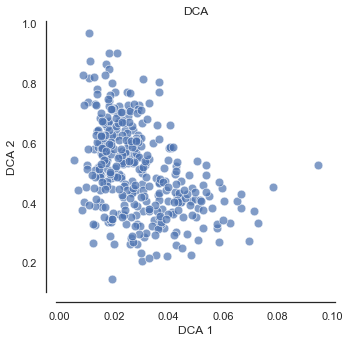

In [74]:
plt.figure(figsize=(5,5))
sns.scatterplot(r00_DCA[:,0], r00_DCA[:,1], s=75, alpha=0.7)
plt.title('DCA')
plt.xlabel('DCA 1')
plt.ylabel('DCA 2')
sns.despine(offset=10)

Again, the DCA components are not rank-ordered.  Need to perform t-SNE to see pattern.

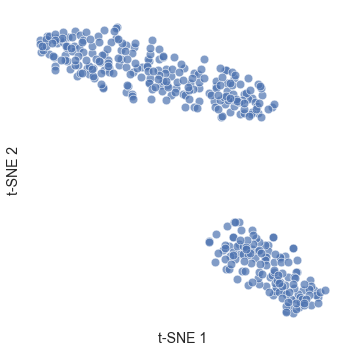

CPU times: user 5.62 s, sys: 71.8 ms, total: 5.69 s
Wall time: 5.59 s


In [75]:
# perform tSNE on DCA-denoised raw data
%time r00_DCA_tSNE = fcc_utils.fcc_tSNE(r00_DCA)

That's much better than the 100-component PCA...

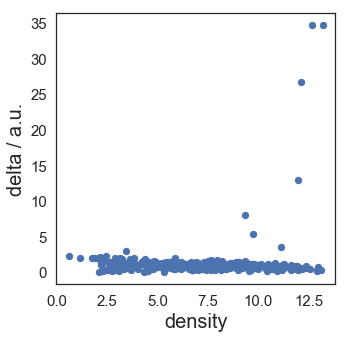

In [76]:
r00_dca_clu = Cluster(r00_DCA_tSNE.astype('double')) # cluster using pydpc

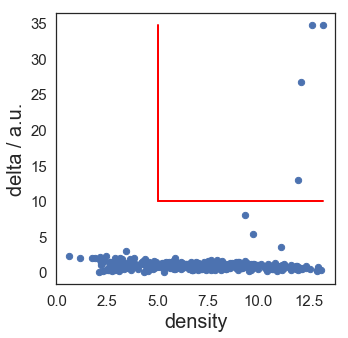

In [77]:
r00_dca_clu.assign(5,10) # assign cluster centers

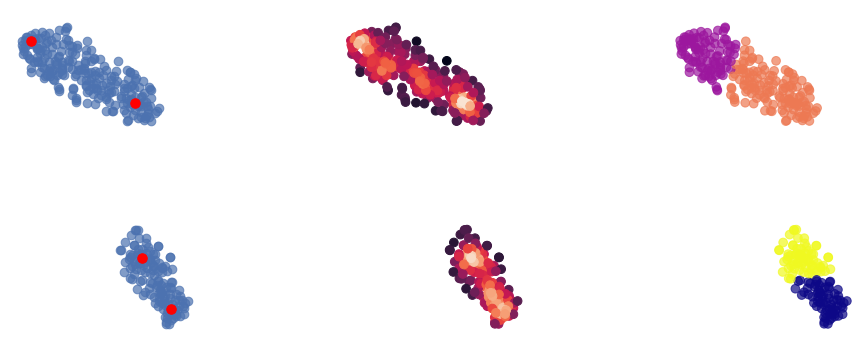

In [78]:
# plot clusters with point densities
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].scatter(r00_DCA_tSNE[:, 0], r00_DCA_tSNE[:, 1], s=75, alpha=0.7)
ax[0].scatter(r00_DCA_tSNE[r00_dca_clu.clusters, 0], r00_DCA_tSNE[r00_dca_clu.clusters, 1], s=90, c="red")
ax[1].scatter(r00_DCA_tSNE[:, 0], r00_DCA_tSNE[:, 1], s=75, c=r00_dca_clu.density)
ax[2].scatter(r00_DCA_tSNE[:, 0], r00_DCA_tSNE[:, 1], s=75, c=r00_dca_clu.membership, cmap=plt.cm.plasma, alpha=0.7)
for _ax in ax:
    _ax.tick_params(labelsize=15)
    _ax.set_aspect('equal')
    _ax.tick_params(labelbottom=False, labelleft=False)

sns.despine(left=True, bottom=True)
fig.tight_layout()

In [79]:
# calculate silhouette score for clustered results
silhouette_score(r00_DCA_tSNE, r00_dca_clu.membership)

0.5377143

---
So DCA-tSNE has an improvement in clustering over PCA-tSNE for this dataset based on silhouette score.  
Let's compare the cell-cell distances for these projections.

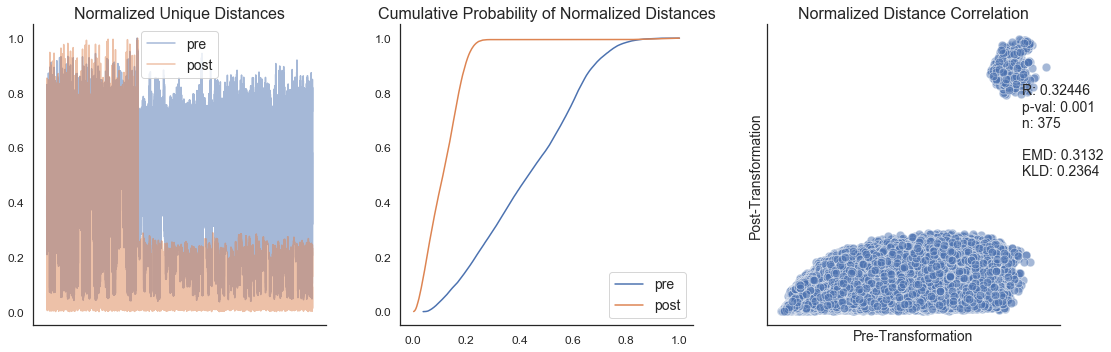

CPU times: user 3.61 s, sys: 146 ms, total: 3.76 s
Wall time: 3.04 s


In [80]:
%time mantel_stats, EMD, KLD = fcc_utils.compare_euclid(pre=r00_PCA, post=r00_tSNE) # compare distances for tSNE to PCA

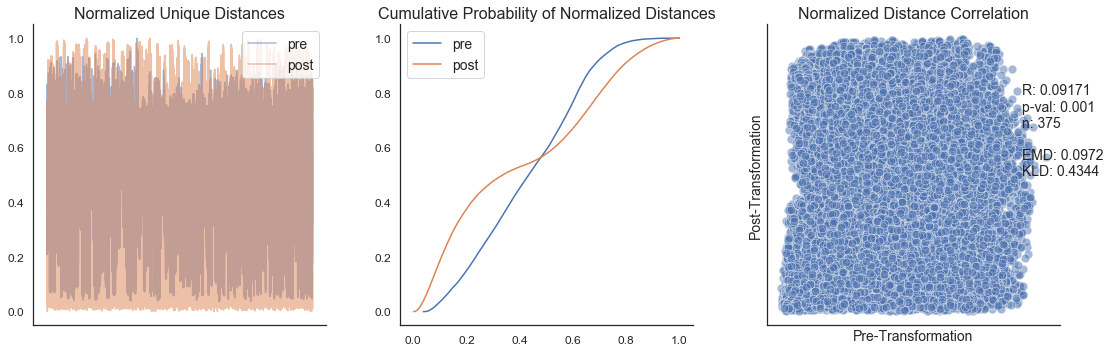

CPU times: user 3.94 s, sys: 175 ms, total: 4.12 s
Wall time: 3.41 s


In [81]:
%time mantel_stats, EMD, KLD = fcc_utils.compare_euclid(pre=r00_PCA, post=r00_DCA_tSNE) 

Based on __EMD__, DCA shows an improvement over PCA.  
The __Kullback-Leibler Divergence__, however, is smaller for the regular PCA-tSNE compared to PCA.  
  
Let's look at __DCA-tSNE vs DCA__ and compare to __PCA-tSNE vs PCA__

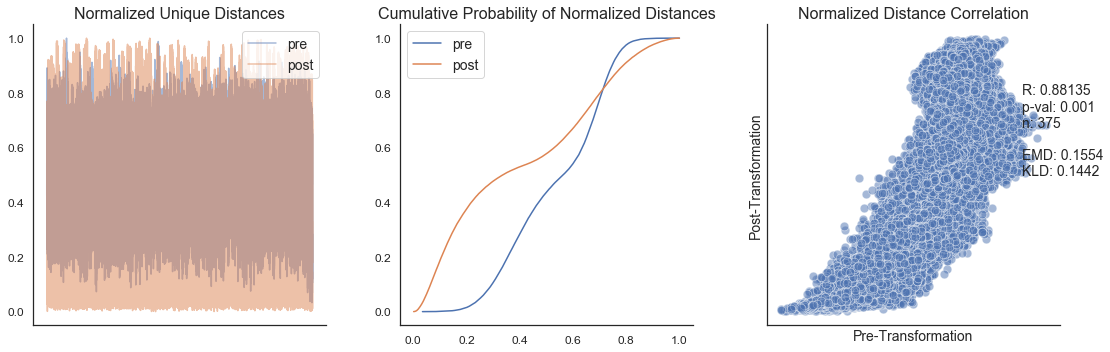

CPU times: user 8.93 s, sys: 1.57 s, total: 10.5 s
Wall time: 9.81 s


In [83]:
%time mantel_stats, EMD, KLD = fcc_utils.compare_euclid(pre=r00_DCA, post=r00_DCA_tSNE) 

t-SNE primed by DCA has better correlation with its DCA initiator than a 100-component PCA does for this dataset.  
This is probably due to DCA removing useless genes and denoising data prior to normalizing, which PCA doesn't. There was also a weird outlier in the PCA for these data, so that contributes to less favorable results from PCA.

---
Open Questions:
* How do I correlate clustered cells across projections/transformations?
* How can you balance the Euclidean distance correlation with clustering? When is "introducing" distance okay as long as you are preserving important cell-cell relationships?